## 4 digits - Merging only year wise

### Waves 4,5,6

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [37]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [38]:
df

,mergeid,wave,year,age,nb_children,nb_grandchildren,partnerinhh,job_status,industry,thinc,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
1,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
2,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
3,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
4,AT-009262-01,4,2011,56.0,1.0,2.0,1,Self-employed,Wholesale and retail trade,29620.0,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,429.722920,219.308017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62300,SI-993306-01,6,2015,58.0,2.0,2.0,1,Private sector employee,"Transport, storage and communication",11000.0,...,84.966667,1558.440706,45.101523,83.100226,89.193943,53.219103,49.092905,101.604526,349.962591,471.060033
62301,SI-993306-01,6,2015,58.0,2.0,2.0,1,Private sector employee,"Transport, storage and communication",11000.0,...,84.966667,1558.440706,45.101523,83.100226,89.193943,53.219103,49.092905,101.604526,349.962591,471.060033
62302,SI-993306-01,6,2015,58.0,2.0,2.0,1,Private sector employee,"Transport, storage and communication",11000.0,...,84.966667,1558.440706,45.101523,83.100226,89.193943,53.219103,49.092905,101.604526,349.962591,471.060033
62303,SI-993306-01,6,2015,58.0,2.0,2.0,1,Private sector employee,"Transport, storage and communication",11000.0,...,84.966667,1558.440706,45.101523,83.100226,89.193943,53.219103,49.092905,101.604526,349.962591,471.060033


In [39]:
df.mergeid.nunique()

6590

In [40]:
df.groupby("country").mergeid.nunique()

country
Austria           389
Belgium           803
Czech Republic    524
Denmark           514
Estonia           788
France            442
Germany           816
Italy             617
Slovenia          374
Spain             758
Switzerland       565
Name: mergeid, dtype: int64

In [41]:
df.groupby("year").mergeid.nunique()

year
2011    3574
2013    4670
2015    4217
Name: mergeid, dtype: int64

In [42]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [43]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,62305.00,62305.00,62305.00,62305.00
mean,56.42,0.53,1.77,12.61
std,3.14,0.50,1.27,4.58
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,10.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,11.00,39.00


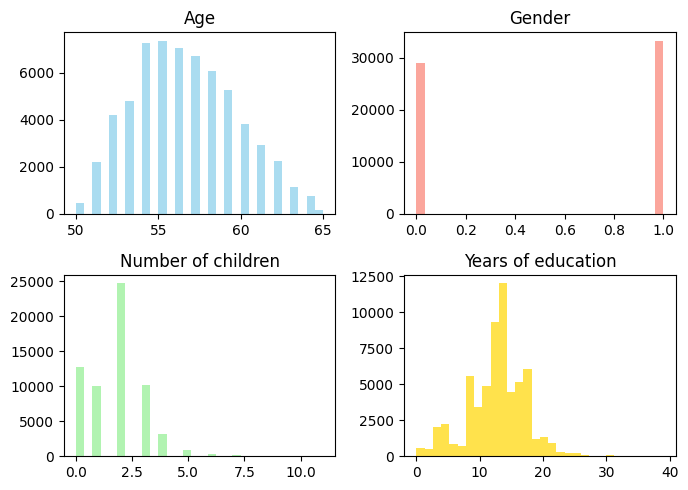

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [45]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.23
Employee                   0.20
Self-employed              0.13
Civil servant              0.04
Name: proportion, dtype: float64

In [46]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,62305.00,62305.00,62305.00,62305.00
mean,35.92,63.12,6.69,0.26
std,6.12,2.11,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,37.00,63.00,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


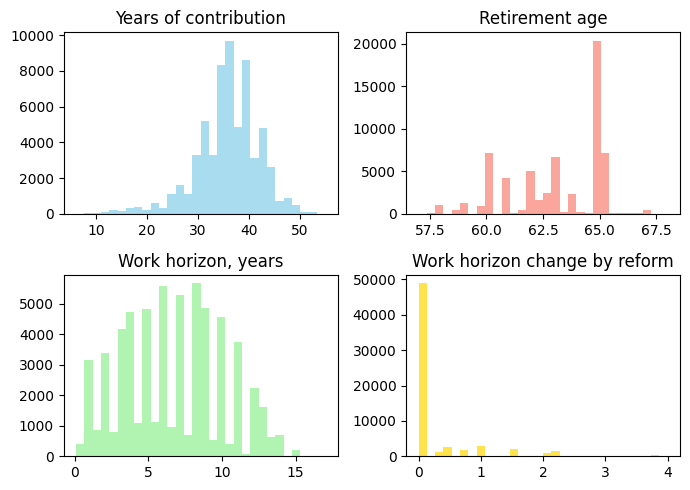

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [48]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [49]:
df["eurod"].value_counts()

eurod
0.0     16515
1.0     15210
2.0     11240
3.0      7730
4.0      5315
5.0      3085
6.0      1685
7.0       855
8.0       360
9.0       225
10.0       60
11.0       20
12.0        5
Name: count, dtype: int64

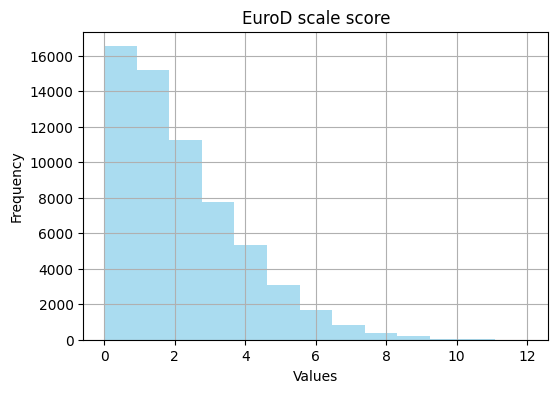

In [50]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [51]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,62305.00,62305.00,62305.00,62305.00,62305.00,62305.00,62305.00
mean,1573.13,58.53,80.49,84.48,50.94,59.82,86.41
std,467.56,13.66,3.77,8.31,6.49,8.56,9.37
min,318.22,5.41,40.91,42.82,20.16,12.50,39.96
25%,1265.73,47.88,78.72,78.14,46.84,54.33,81.63
50%,1502.92,57.83,80.66,87.26,50.39,60.42,88.77
75%,1789.99,70.31,82.62,91.57,54.65,65.53,93.26
max,6766.63,89.61,100.00,98.90,88.37,87.50,100.00


### Waves 4,5,6 common individuals

In [52]:
df.mergeid.nunique()

6590

In [53]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1670

In [54]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [55]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           127
Belgium           225
Czech Republic    126
Denmark           152
Estonia           278
France            156
Germany            24
Italy             111
Slovenia           74
Spain             107
Switzerland       290
Name: mergeid, dtype: int64

In [56]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [57]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [58]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [59]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [60]:
w46.mergeid.nunique()

5863

In [61]:
w46.groupby("country").mergeid.nunique()

country
Austria           372
Belgium           721
Czech Republic    455
Denmark           460
Estonia           746
France            425
Germany           645
Italy             537
Slovenia          346
Spain             600
Switzerland       556
Name: mergeid, dtype: int64

In [62]:
w46.groupby("wave").mergeid.nunique()

wave
4    3574
6    4217
Name: mergeid, dtype: int64

In [63]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [64]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1928

In [65]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [66]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           149
Belgium           267
Czech Republic    155
Denmark           163
Estonia           316
France            178
Germany            27
Italy             137
Slovenia           91
Spain             125
Switzerland       320
Name: mergeid, dtype: int64

In [67]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [68]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_common.csv",
    index=False,
)